# RQ 3: Seasonality

In [ ]:
import pandas as pd

#load the data
listings_nyc = pd.read_csv("./drive/MyDrive/listings_nyc.csv")


listings_toronto = pd.read_csv("./drive/MyDrive/listings_toronto.csv")

In [ ]:
num_columns_nyc = len(listings_nyc.columns)
num_columns_toronto = len(listings_toronto.columns)


column_names_nyc = set(listings_nyc.columns)
column_names_toronto = set(listings_toronto.columns)

#check the columns
print("Number of columns in NYC dataset:", num_columns_nyc)
print("Number of columns in Toronto dataset:", num_columns_toronto)
print("Column names in NYC dataset:", column_names_nyc)
print("Column names in Toronto dataset:", column_names_toronto)

# Check if the column names are identical
if column_names_nyc == column_names_toronto:
  print("Column names are identical in both datasets.")
else:
  print("Column names differ between the datasets.")

Number of columns in NYC dataset: 75
Number of columns in Toronto dataset: 75
Column names in NYC dataset: {'minimum_nights', 'calculated_host_listings_count', 'calendar_last_scraped', 'number_of_reviews', 'host_total_listings_count', 'property_type', 'scrape_id', 'host_name', 'id', 'picture_url', 'host_response_time', 'bedrooms', 'maximum_nights', 'host_is_superhost', 'host_identity_verified', 'neighbourhood_cleansed', 'review_scores_cleanliness', 'calculated_host_listings_count_shared_rooms', 'minimum_nights_avg_ntm', 'availability_30', 'review_scores_rating', 'calculated_host_listings_count_entire_homes', 'bathrooms_text', 'neighbourhood_group_cleansed', 'host_listings_count', 'longitude', 'source', 'host_has_profile_pic', 'minimum_minimum_nights', 'instant_bookable', 'calculated_host_listings_count_private_rooms', 'host_acceptance_rate', 'host_thumbnail_url', 'calendar_updated', 'listing_url', 'price', 'review_scores_accuracy', 'neighbourhood', 'first_review', 'availability_60', 'n

In [ ]:
# Drop unnecessary columns from both datasets
columns_to_drop = ['name', 'last_review', 'reviews_per_month', "host_name", "number_of_reviews",'number_of_reviews_ltm']


listings_toronto.drop(columns=columns_to_drop, inplace=True)
listings_nyc.drop(columns=columns_to_drop, inplace=True)

# Check for missing values in both datasets
missing_values_nyc = listings_nyc.isnull().sum()
missing_values_toronto = listings_toronto.isnull().sum()

In [ ]:
#grab without empty values
listings_nyc = listings_nyc[listings_nyc['price'].notna()]
listings_toronto = listings_toronto[listings_toronto['price'].notna()]

In [ ]:
listings_nyc.head()

,id,listing_url,scrape_id,last_scraped,source,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,816783428767938211,https://www.airbnb.com/rooms/816783428767938211,20240307173355,2024-03-08,city scrape,My studio is 3 minutes from the subway.,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,47125955,https://www.airbnb.com/users/show/47125955,...,5.00,5.00,5.00,5.00,NaN,f,2,2,0,0
6,1081507139395912406,https://www.airbnb.com/rooms/1081507139395912406,20240307173355,2024-03-07,city scrape,Situated at the highest natural point in New Y...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,389563894,https://www.airbnb.com/users/show/389563894,...,NaN,NaN,NaN,NaN,NaN,f,2,0,2,0
7,7389120,https://www.airbnb.com/rooms/7389120,20240307173355,2024-03-07,city scrape,Private one bedroom apartment for your vacatio...,The neighborhood is great. In five minutes fro...,https://a0.muscache.com/pictures/miso/Hosting-...,7365834,https://www.airbnb.com/users/show/7365834,...,4.82,4.84,4.63,4.57,NaN,f,4,4,0,0
8,786149074369437257,https://www.airbnb.com/rooms/786149074369437257,20240307173355,2024-03-07,city scrape,Forget your worries in this spacious and seren...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,19876158,https://www.airbnb.com/users/show/19876158,...,NaN,NaN,NaN,NaN,NaN,f,1,0,1,0
9,777572930730588568,https://www.airbnb.com/rooms/777572930730588568,20240307173355,2024-03-07,city scrape,1 private bedroom with a Bathroom<br />Free wi...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,474691192,https://www.airbnb.com/users/show/474691192,...,NaN,NaN,NaN,NaN,NaN,f,1,0,1,0


In [ ]:
#transform the data for data analysis
df_tor = listings_toronto[['availability_30','availability_60','availability_90','availability_365','price']]
df_nyc = listings_nyc[['availability_30','availability_60','availability_90','availability_365','price']]
df_tor['price'] = df_tor['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)
df_nyc['price'] = df_nyc['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)


<ipython-input-6-749b15aa57da>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tor['price'] = df_tor['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)
<ipython-input-6-749b15aa57da>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nyc['price'] = df_nyc['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)


In [ ]:
#correlation matrix
corr_tor = df_tor.corr()
corr_tor.style.background_gradient(cmap='coolwarm')

,availability_30,availability_60,availability_90,availability_365,price
availability_30,1.000000,0.934552,0.862161,0.393416,0.076501
availability_60,0.934552,1.000000,0.966671,0.434935,0.063721
availability_90,0.862161,0.966671,1.000000,0.484116,0.056923
availability_365,0.393416,0.434935,0.484116,1.000000,0.026108
price,0.076501,0.063721,0.056923,0.026108,1.000000


In [ ]:
corr_nyc = df_nyc.corr()
corr_nyc.style.background_gradient(cmap='coolwarm')

,availability_30,availability_60,availability_90,availability_365,price
availability_30,1.000000,0.936554,0.870733,0.403313,0.020942
availability_60,0.936554,1.000000,0.967117,0.471680,0.019820
availability_90,0.870733,0.967117,1.000000,0.540942,0.019549
availability_365,0.403313,0.471680,0.540942,1.000000,0.023260
price,0.020942,0.019820,0.019549,0.023260,1.000000


With initial EDA we can see that there is not a strong correlation between the price and the listing rates which are represented by availability. There is a strong corrilation between the different kinds of lifting rates. Let's see there is a correlation between the seasonlity and the availability and price.

In [ ]:
#Represent availability but the number of bookings
df_tor['availability_30'] = 30 - df_tor['availability_30']
df_tor['availability_60'] = 60 - df_tor['availability_60']
df_tor['availability_90'] = 90 - df_tor['availability_90']
df_tor['availability_365'] = 365 - df_tor['availability_365']
df_nyc['availability_30'] = 30 - df_nyc['availability_30']
df_nyc['availability_60'] = 60 - df_nyc['availability_60']
df_nyc['availability_90'] = 90 - df_nyc['availability_90']
df_nyc['availability_365'] = 365 - df_nyc['availability_365']

<ipython-input-9-360e713b61c2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tor['availability_30'] = 30 - df_tor['availability_30']
<ipython-input-9-360e713b61c2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tor['availability_60'] = 60 - df_tor['availability_60']
<ipython-input-9-360e713b61c2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

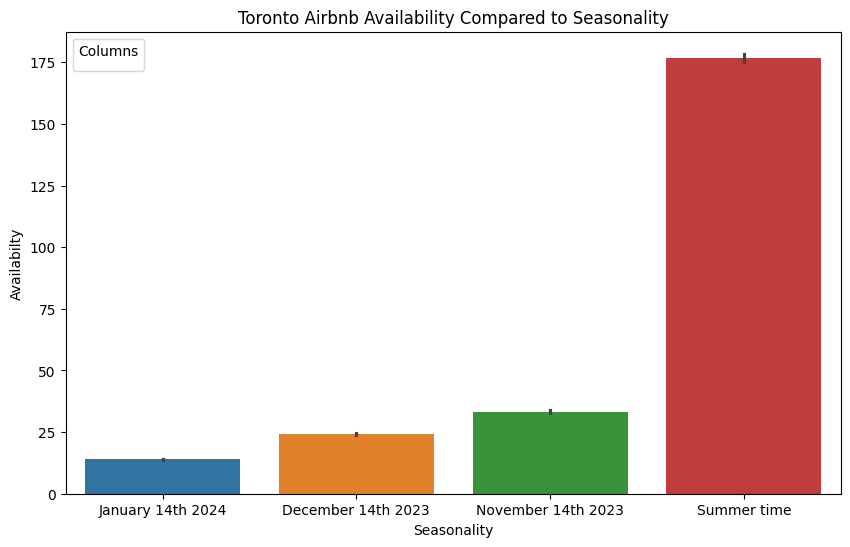

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
df_tora = df_tor[['availability_30','availability_60','availability_90','availability_365']]
df_nyca = df_nyc[['availability_30','availability_60','availability_90','availability_365']]
# Set dates and seasons
set_values = ['January 14th 2024', 'December 14th 2023', 'November 14th 2023', 'Summer time']

# Melt the dataframe
df_melted = pd.melt(df_tora.reset_index(), id_vars='index', value_vars=df_tora.columns)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='variable', y='value', hue='variable', data=df_melted)
plt.xlabel('Seasonality')
plt.ylabel('Availabilty')
plt.xticks(range(len(set_values)), set_values)
plt.title('Toronto Airbnb Availability Compared to Seasonality')
plt.legend(title='Columns')
plt.show()

Due to the incompleteness of the data set, we will work with what we have available. The seasonality is represented by the last 3 months and the year. It seems that the summertime has the most availability during the summer which seems counter-intuitive for toronto but the wintertime seems to have a 60% availability rate and it goes down to about 50% around Christmas time which also seems to be the rate in the summer.

   index         variable  value
0      0  availability_30      1
1      6  availability_30      1
2      7  availability_30      0
3      8  availability_30      1
4      9  availability_30      0


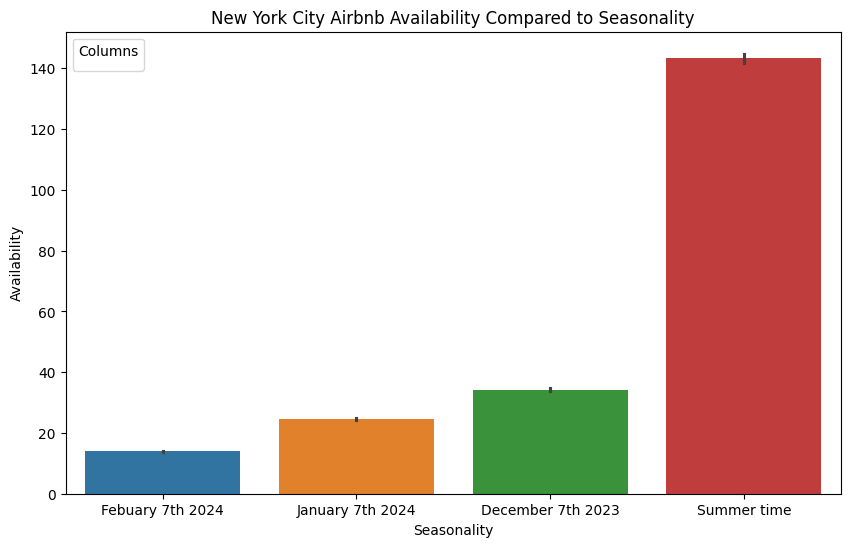

In [ ]:
set_values = ['Febuary 7th 2024', 'January 7th 2024', 'December 7th 2023', 'Summer time']

# Melt the dataframe
df_melted = pd.melt(df_nyca.reset_index(), id_vars='index', value_vars=df_tora.columns)
print(df_melted.head())

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='variable', y='value', hue='variable', data=df_melted)
plt.xlabel('Seasonality')
plt.ylabel('Availability')
plt.xticks(range(len(set_values)), set_values)
plt.title('New York City Airbnb Availability Compared to Seasonality')
plt.legend(title='Columns')
plt.show()

We experience a similar trend with New York where the availability rate is at 60% during the winter, but then it drops to 40% during Christmas time and summer time.

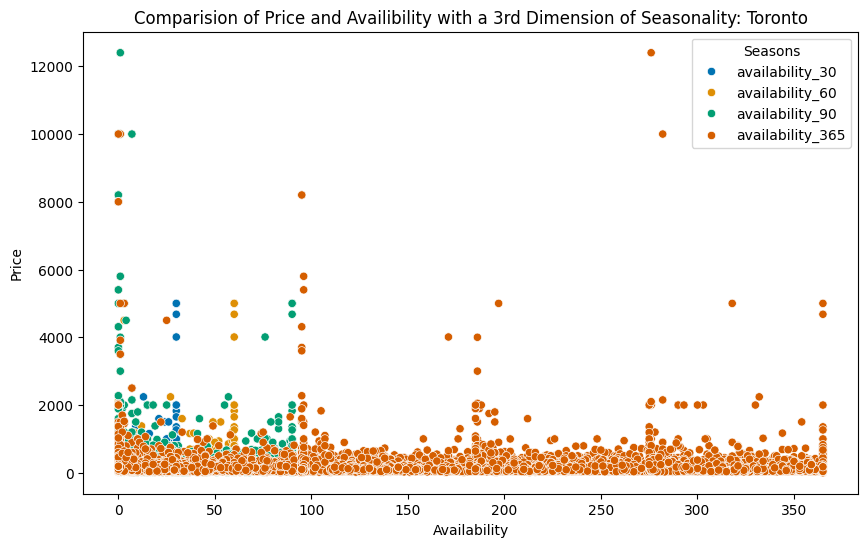

In [ ]:
df_melted = pd.melt(df_tor, id_vars='price', value_vars=['availability_30','availability_60','availability_90','availability_365'])

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_melted, x='value', y='price', hue='variable', palette='colorblind')
plt.title('Comparision of Price and Availibility with a 3rd Dimension of Seasonality: Toronto')
plt.xlabel('Availability')
plt.ylabel('Price')
plt.legend(title='Seasons')
plt.show()

The data in the seasonality comparison to price and listing trends is quite dense, however using data analysis one can extrapolate that the ones most people book around Christmas time and that price seem to jump a little bit compared to those year round. However due to the shear size of the data and the incompleteness of it, it is safe to conclude that for Toronto, the seasonality of summer and Christmas only seem to affect price and tenant frequency slightly on the higher side.

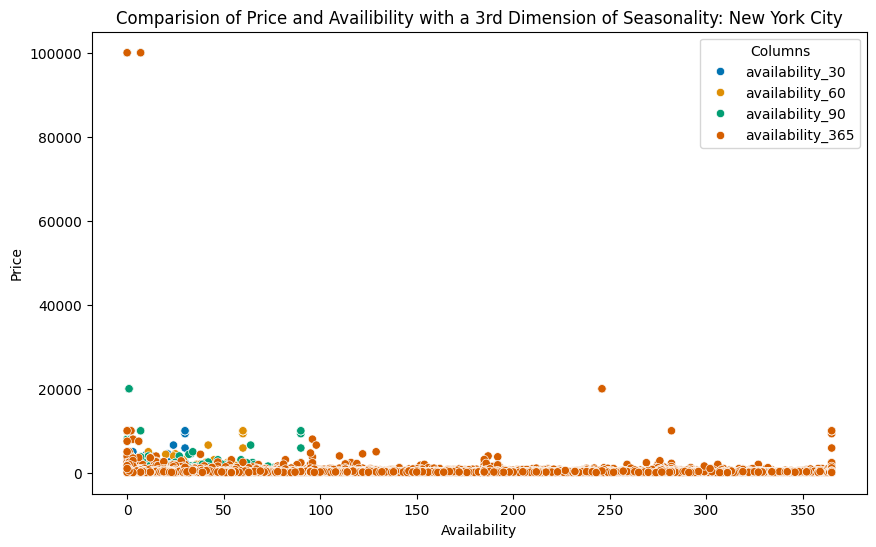

In [ ]:
df_melted = pd.melt(df_nyc, id_vars='price', value_vars=['availability_30','availability_60','availability_90','availability_365'])

# Plot using Seaborn with x and y swapped
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_melted, x='value', y='price', hue='variable', palette='colorblind')
plt.title('Comparision of Price and Availibility with a 3rd Dimension of Seasonality: New York City')
plt.xlabel('Availability')
plt.ylabel('Price')
plt.legend(title='Columns')
plt.show()

The New York City data is more dense than the Toronto dataset, however, the visualization is skewed because of New York City's outliers; there are some expensive Airbnb's listed. From the data analysis we can extrapolate two conclusions. The first is that the seasonality of the year does not affect the foot traffic in New York City. The properties that are available stay available for most of the year and Airbnberties that are always full stay full. But the second is that there does seem to be a trend in the price of the Airbnb's and the Christmas season. There does seem to be a reasonable uptick in price of Airbnbs and their prices.